# Raport z zadania algorytm genetyczny
### Aleksander Szymczyk
## Import bibliotek

In [1]:
from genetic import Genetic
from physics import target_function
from experiment import experiment, create_table, satisfy_budget
from tabulate import tabulate
from plotter import plot_results, plot_example, plot_bar

### Algorytm
Zaimplementowany algorytm genetyczny wykorzystuje selekcje ruletkową z krzyżowaniem jednopunktowym oraz sukcesją generacyjną.
### Przykład działania
- $\mu$ = 60
- t_max = 400
- pc = 0.85
- pm = 0.05

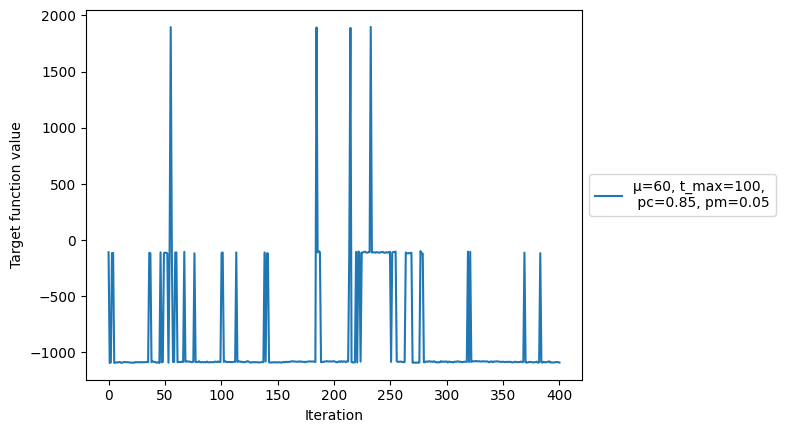

In [2]:
example = Genetic()
POP_N = 60
T_MAX = 400
PC = 0.85
PM = 0.05
ex_best = example.solve(target_function, pop_n=POP_N, t_max=T_MAX, pc=PC, pm=PM)
values = example.get_best_grades()
plot_example(values, T_MAX, "\u03BC=60, t_max=100,\n pc=0.85, pm=0.05")

## Cel eksperymentów
Zamierzam sprawdzić działanie algorytmu dla różnych hiperparametrów. Eksperymenty polegają na przeprowadzeniu 25 przebiegów algorytmu genetycznego dla każdej kombinacji hiperaparametrów, z których następnie wyciągany jest średni wynik wraz z odchyleniem standardowym. Badania umożliwiają porównanie wyników dla różnych populacji, ponieważ budżet wywołań funkcji celu jest stały (iloczyn liczby osobników i liczby iteracji jest stały). Przeprowadze badanie:
- 4 różnych kombinacji osobników z liczbą iteracji
- 4 różnych prawdopodobieństw krzyżowania
- 4 różnych prawdopodobieństw mutacji

In [3]:
INDIVIDUALS_NUMBER = [4, 8, 20, 40]
ITERATION_NUMBER = [100, 200, 500, 1000]
CROSSOVER_RATE = [0.6, 0.75, 0.85, 0.95]
MUTATION_RATE = [0.01, 0.05, 0.1, 0.2]
BUDGET = 4000
results = experiment(INDIVIDUALS_NUMBER, ITERATION_NUMBER, CROSSOVER_RATE, MUTATION_RATE, BUDGET)
ind_and_iter = satisfy_budget(INDIVIDUALS_NUMBER, ITERATION_NUMBER, BUDGET)
table = create_table(ind_and_iter,  CROSSOVER_RATE, MUTATION_RATE, results[0], results[1])
print(tabulate(table, headers="keys", tablefmt="fancy_grid"))

╒═════════════════════╤══════════════════════╤═════════════════════╤═════════════════════╤════════════════════════╤══════════════════════════════╕
│   Experiment number │   Individuals number │   Iterations number │   Cross probability │   Mutation probability │ Mean best result (25 runs)   │
╞═════════════════════╪══════════════════════╪═════════════════════╪═════════════════════╪════════════════════════╪══════════════════════════════╡
│                   1 │                    4 │                1000 │                0.6  │                   0.01 │ -368.92+-1173.02             │
├─────────────────────┼──────────────────────┼─────────────────────┼─────────────────────┼────────────────────────┼──────────────────────────────┤
│                   2 │                    4 │                1000 │                0.6  │                   0.05 │ 335.32+-893.51               │
├─────────────────────┼──────────────────────┼─────────────────────┼─────────────────────┼────────────────────────┼───

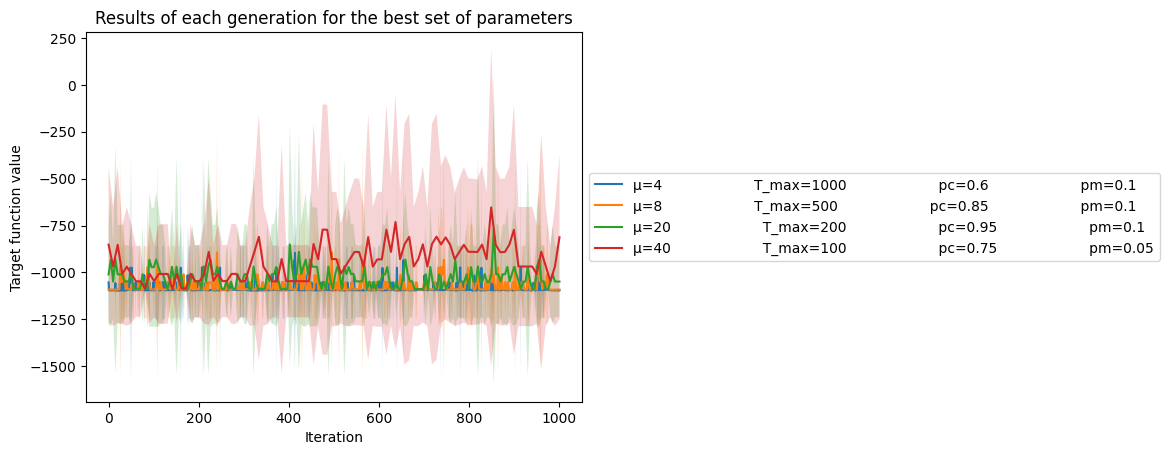

In [4]:
plot_results(table, results[0], results[2], results[3])

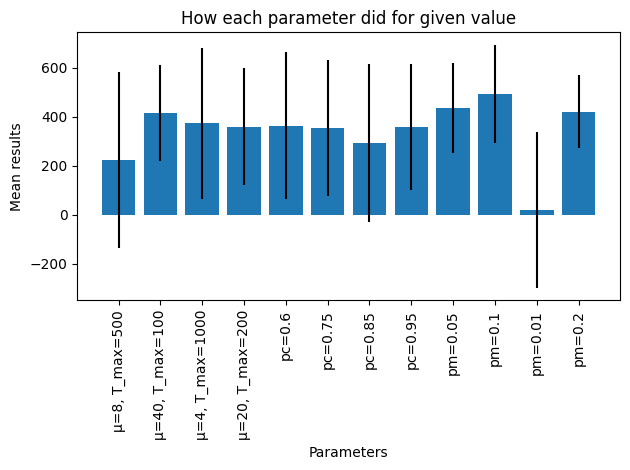

In [5]:
parameters = ["Individuals number", "Cross probability", "Mutation probability"]
shortcuts = {"Individuals number": "\u03BC", "t_max": "T_max", "Cross probability": "pc", "Mutation probability": "pm"}
plot_bar(table, results[0], parameters, shortcuts)

# Wyniki
- Większa liczba osobników kosztem mniejszej liczby iteracji zawsze osiągała wyższy średni wynik.
- Im większa liczba osobników tym większe odchylenie standardowe.
- Najgorsze wyniki są osiągane dla pm=0.01
- Pozostałe wyniki są bardziej zbliżone.
# Wnioski
- Selekcja ruletkowa sprawia, że nie mamy pewności czy zachowamy najlepsze rozwiązanie, co prowadzi do tego, że kolejne generacje mogą być gorsze niż poprzednie (wykres pierwszy).
- Większa liczba osobników znacząco rozszerza eksplorację co może prowadzić do dużo lepszy oraz dużo gorszych wyników (większe odchylenie standardowe).
- Prawdopodobieństwo mutacji pm=0.01 osiągnęło najgorsze średnie wyniki. Oznacza to, że było ono zbyt małe by wystarczająco eksplorować przestrzeń przeszukiwań.
- Nie da się wybrać pojedynczego najlepszego parametru, ponieważ najlepsze wyniki były osiągane przy kombinacji dającej odpowiedni balans pomiędzy eksploatacją a eksploracją.
- Parametry najlepiej zachowujące ten balans dla zadanego problemu: $\mu$=40, T_max=100, pc=0.75, pm=0.05